<a href="https://colab.research.google.com/github/fabrizioaymone/machinelearning/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")
!chmod 775 -R '/content/gdrive/My Drive/Colab Notebooks'

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

# CRASH DATASET
In this notebook we will analize the [crash dataset](https://www.kaggle.com/datasets/prasannakm/car-crash-dataset?select=train-new.csv) and build a model able to predect crash severity.

In [ ]:
df_train = pd.read_csv("/content/gdrive/MyDrive/DataSets/train-new.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/DataSets/test-new.csv")
df = pd.concat([df_train, df_test])

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = 100*(df.isnull().sum()/df.isnull().count())
missing_data = pd.concat([total, percent], axis = 1)
def color_map(v):
  if v>0:
    return 'color: blue'
missing_data.style.applymap(color_map)

,0,1
injSeverity,8652,33.001488
yearVeh,1,0.003814
dvcat,0,0.000000
weight,0,0.000000
dead,0,0.000000
airbag,0,0.000000
seatbelt,0,0.000000
frontal,0,0.000000
sex,0,0.000000
ageOFocc,0,0.000000


In [ ]:
df.shape

(26217, 15)

In [ ]:
df

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997.0,deploy,driver,1,45:150:1,3.0
1,25-39,154.960,alive,none,none,1,m,26,2001,1968.0,unavail,driver,0,76:40:1,3.0
2,55+,38.994,alive,none,none,1,f,51,2002,1994.0,unavail,driver,0,11:184:1,3.0
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996.0,deploy,pass,1,9:17:1,3.0
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997.0,nodeploy,pass,0,2:2:2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,10-24,64.757,alive,airbag,none,0,m,37,2001,1999.0,nodeploy,driver,0,6:71:2,NaN
8648,1-9km/h,178.651,alive,airbag,none,1,f,16,2001,2001.0,deploy,pass,1,76:57:2,NaN
8649,25-39,482.272,alive,airbag,belted,1,m,16,1997,1992.0,deploy,driver,1,74:65:1,NaN
8650,55+,32.467,alive,none,belted,1,m,26,1998,1994.0,unavail,driver,0,12:4:2,NaN


In [ ]:
df[df.yearVeh.isnull()].index

Int64Index([1671], dtype='int64')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(17565, 15)

In [ ]:
df.drop(df[df.weight ==0].index, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17423 entries, 0 to 17564
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        17423 non-null  object 
 1   weight       17423 non-null  float64
 2   dead         17423 non-null  object 
 3   airbag       17423 non-null  object 
 4   seatbelt     17423 non-null  object 
 5   frontal      17423 non-null  int64  
 6   sex          17423 non-null  object 
 7   ageOFocc     17423 non-null  int64  
 8   yearacc      17423 non-null  int64  
 9   yearVeh      17423 non-null  float64
 10  abcat        17423 non-null  object 
 11  occRole      17423 non-null  object 
 12  deploy       17423 non-null  int64  
 13  caseid       17423 non-null  object 
 14  injSeverity  17423 non-null  float64
dtypes: float64(3), int64(4), object(8)
memory usage: 2.1+ MB


In [ ]:
df.yearVeh.describe()

count    17423.000000
mean      1992.807553
std          5.568887
min       1953.000000
25%       1989.000000
50%       1994.000000
75%       1997.000000
max       2003.000000
Name: yearVeh, dtype: float64

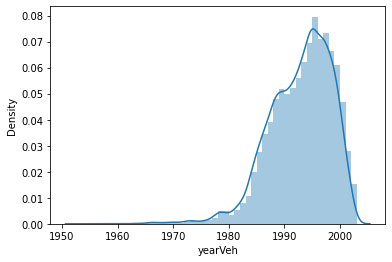

In [ ]:
sns.distplot(df.yearVeh)

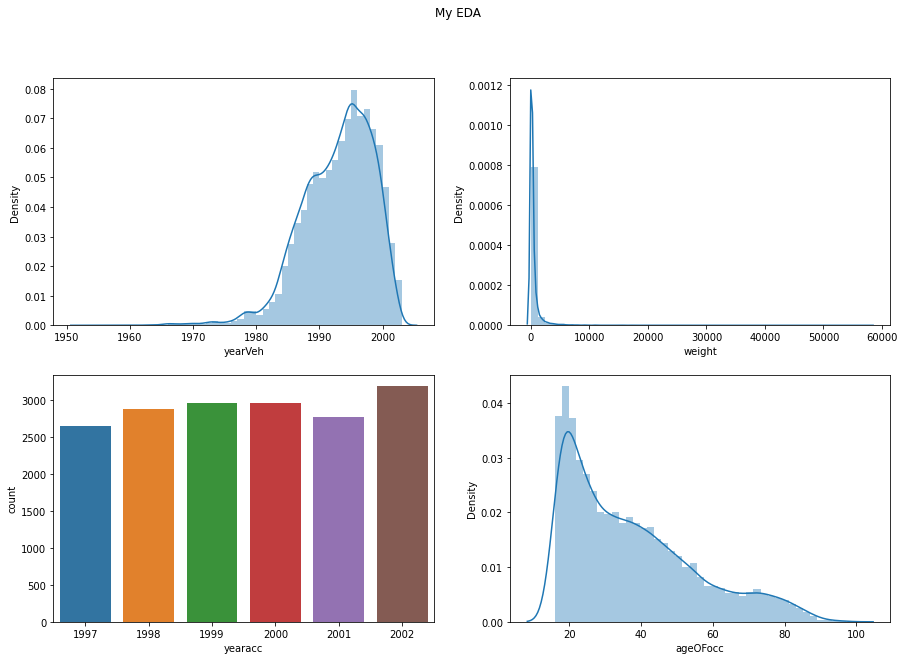

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15, 10))
fig.suptitle("My EDA")
sns.distplot(df.yearVeh, ax=axs[0][0])
sns.distplot(df.weight, ax=axs[0][1])
sns.countplot(df.yearacc, ax=axs[1][0])
sns.distplot(df.ageOFocc, ax=axs[1][1])

In [ ]:
print("skewness: %f" % df.yearVeh.skew())

skewness: -0.882935


In [ ]:
print("kurtosis : %f" % df.yearVeh.kurtosis())

kurtosis : 1.478697


In [ ]:
from sklearn.preprocessing import StandardScaler
yearVeh_scaled = StandardScaler().fit_transform(df.yearVeh[:,np.newaxis])
low_range = yearVeh_scaled[yearVeh_scaled[:,0].argsort()][:10]
high_range = yearVeh_scaled[yearVeh_scaled[:,0].argsort()][-10:]

In [ ]:
print("low_range")
print(low_range)
print("high_range")
print(high_range)

low_range
[[-7.14841207]
 [-6.07096648]
 [-5.71181796]
 [-5.35266943]
 [-5.35266943]
 [-5.35266943]
 [-5.17309516]
 [-4.9935209 ]
 [-4.9935209 ]
 [-4.9935209 ]]
high_range
[[1.83030112]
 [1.83030112]
 [1.83030112]
 [1.83030112]
 [1.83030112]
 [1.83030112]
 [1.83030112]
 [1.83030112]
 [1.83030112]
 [1.83030112]]


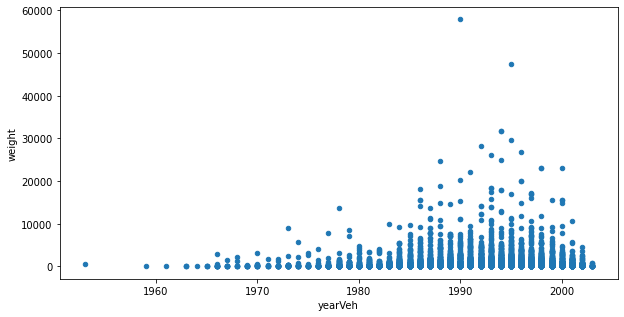

In [ ]:
df.plot.scatter(x="yearVeh", y= "weight", figsize=(10, 5))

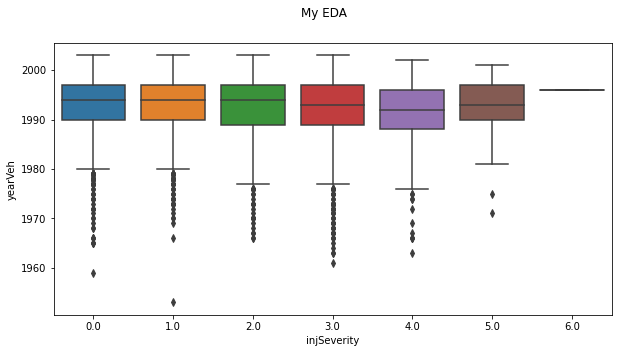

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle("My EDA")
sns.boxplot(x=df.injSeverity, y=df.yearVeh)

In [ ]:
df.yearVeh.describe()

count    17423.000000
mean      1992.807553
std          5.568887
min       1953.000000
25%       1989.000000
50%       1994.000000
75%       1997.000000
max       2003.000000
Name: yearVeh, dtype: float64

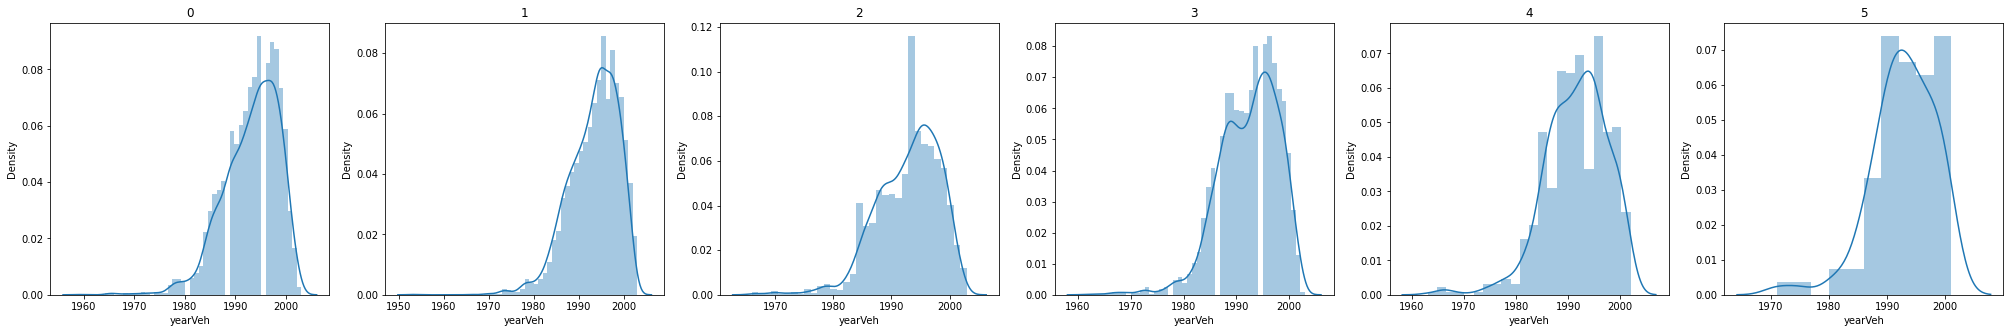

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(35, 5))
for i in range(0,6):
  axs[i].set_title("%d" %i)
  sns.distplot(df[df.injSeverity==i]["yearVeh"], ax=axs[i])

In [ ]:
for i in range(0,6):
  print("inj {} has skewness: {}".format( i, df[df.injSeverity==i]["yearVeh"].skew()))
  print("inj {} has kurtosis: {}".format( i, df[df.injSeverity==i]["yearVeh"].kurtosis()))
  

inj 0 has skewness: -0.930144408413834
inj 0 has kurtosis: 1.5321619161615914
inj 1 has skewness: -0.8770428863517128
inj 1 has kurtosis: 1.3973442346568938
inj 2 has skewness: -0.8860289997374131
inj 2 has kurtosis: 1.3967229065413957
inj 3 has skewness: -0.8442140657657438
inj 3 has kurtosis: 1.4548424065867716
inj 4 has skewness: -0.8467722110299245
inj 4 has kurtosis: 1.7686685057444955
inj 5 has skewness: -1.0708850008782749
inj 5 has kurtosis: 2.3328767924566076


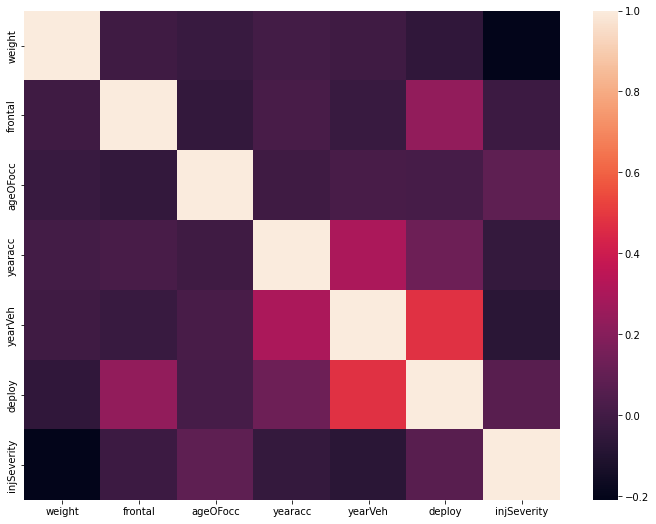

In [ ]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr())

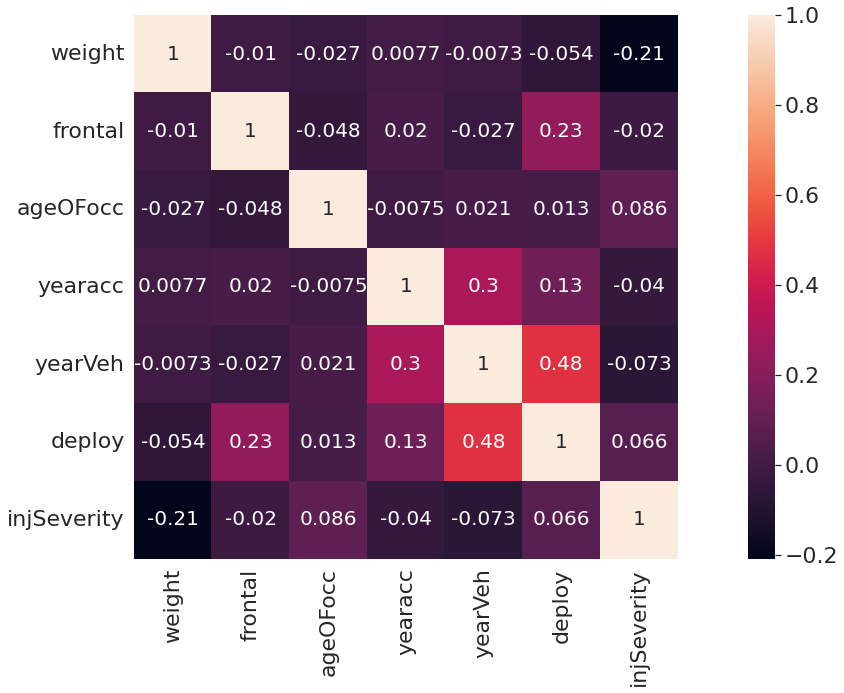

In [ ]:
corrmat = df.corr()
fig, ax= plt.subplots(figsize=(25,10))
cols = corrmat.index
sns.set(font_scale=2)
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, square=True, annot=True, annot_kws={'size':20}, yticklabels=cols.values, xticklabels=cols.values)

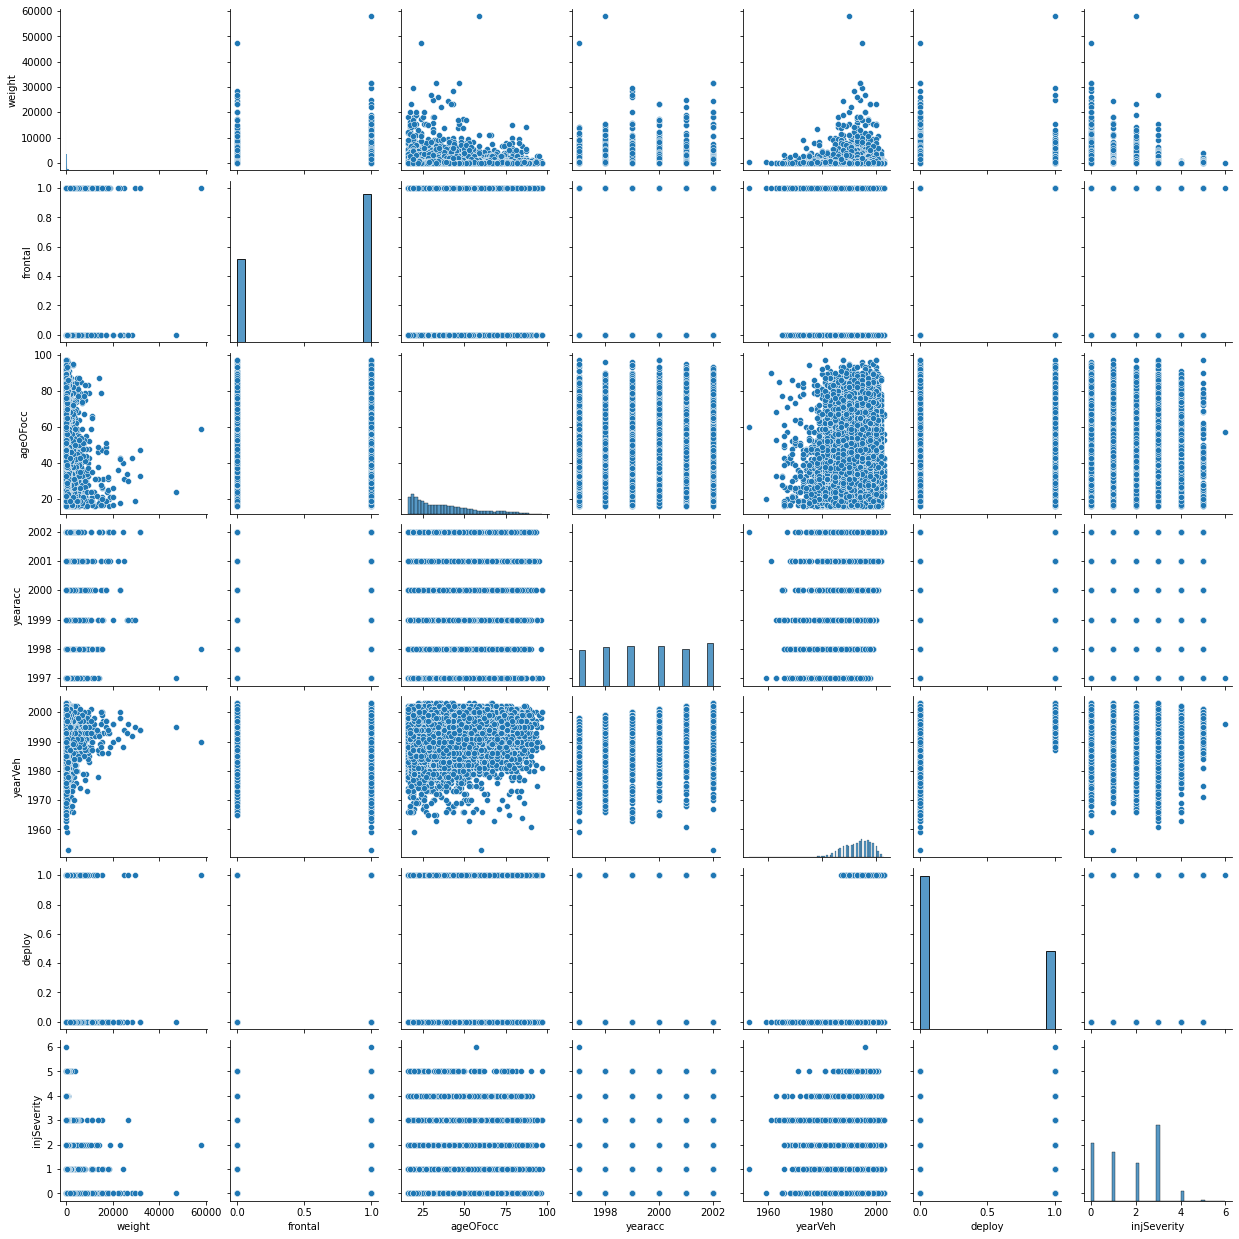

In [ ]:
 sns.pairplot(df)

In [ ]:
np.corrcoef(df.yearVeh, df.deploy)

array([[1.       , 0.4791384],
       [0.4791384, 1.       ]])

In [168]:
df.dead = df["dead"].apply(lambda x: 1 if x=="dead" else 0)

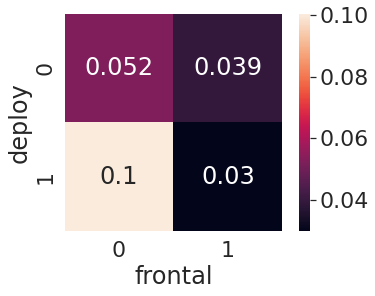

In [171]:
table = pd.pivot_table(data=df, index="deploy", columns="frontal", values="dead")
sns.heatmap(table, square=True, annot=True)